# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [7]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [8]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [9]:
import os
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

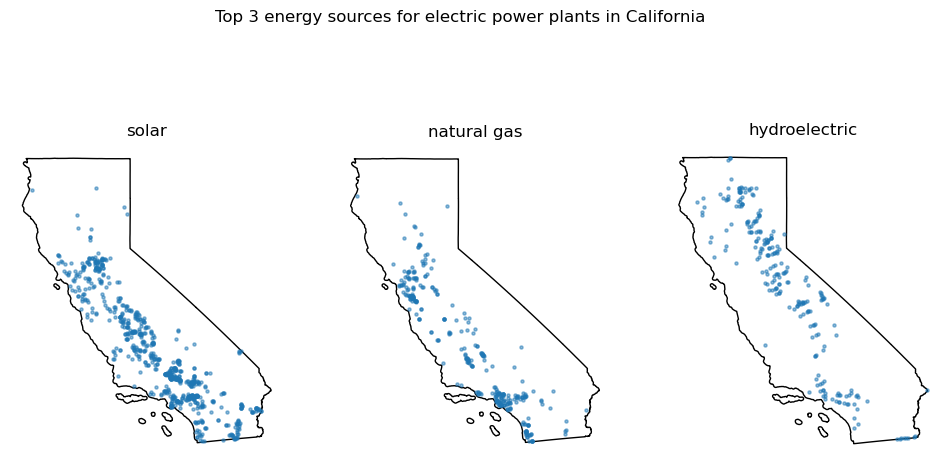

In [10]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Example: We want to obtain the top power sources for any state programmtically as a function
### Step 1: solve for a specific example
Example solve it once for CA

In [12]:
state_power_plants = power_plants[power_plants['state']=='California']
top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
               .tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: define the 
and 
step 4: adjust paramters

In [17]:
def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = (state_power_plants['primsource']
                                      .value_counts()
                                      .index[:3]
                                      .tolist())
    return top_sources

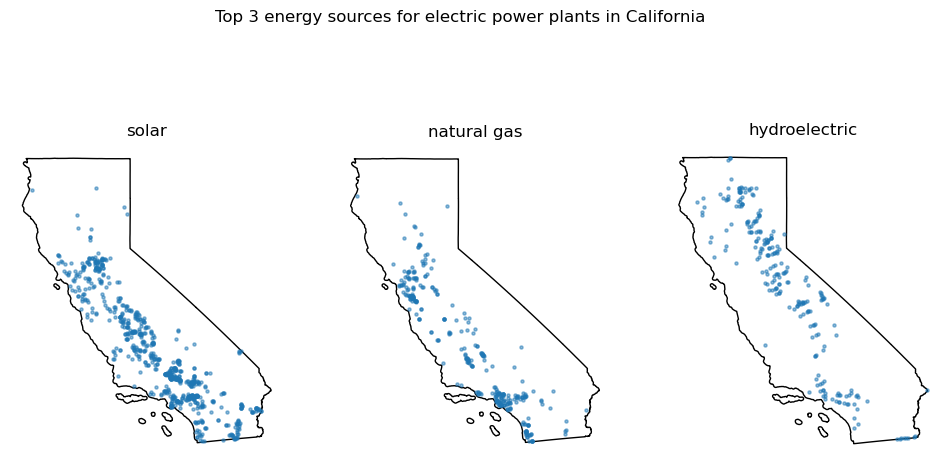

In [19]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Step2: which parts of the code need to be generalied
Anything where CA is used specifically 

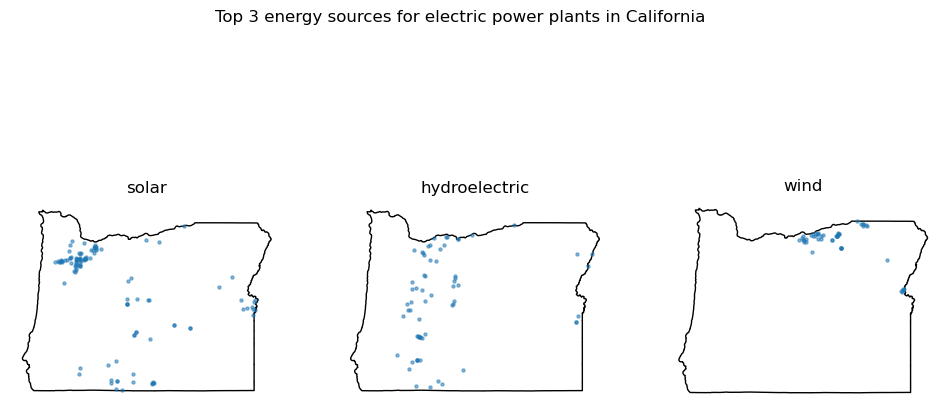

In [22]:
state = "Oregon"
# Select state power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == state]
ca_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
ca_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

In [31]:
def plot_top3_power_sources(state, power_plants, states):
    # Select state power plants and boundary
    ca_power_plants = power_plants[power_plants['state'] == state]
    ca_boundary = states[states['name'] == state]

    # State top 3 power sources were previously given
    ca_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        ca_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

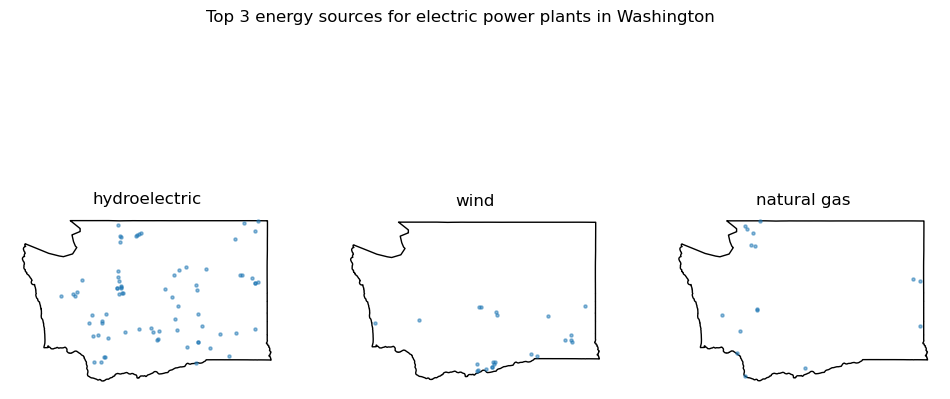

In [32]:
plot_top3_power_sources("Washington", power_plants, states)

In [ ]:
# Step1: solve an example
power_source_counts = power_plants[power_plants['primsource']=='wind']
top_states = (power_source_counts['state']
               .value_counts()
               .index[:3]
               .tolist())
top_states

['Texas', 'Minnesota', 'Iowa']

In [42]:
# or
topstates = power_plants[power_plants.primsource =='wind'].state.value_counts()
top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [41]:
# step 2 identify what need t be generalized
source = "wind" # can change peram to nuclear and you will get the output
top_states = power_plants[power_plants.primsource == source].state.value_counts()
top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [45]:
# step3 &4 wrap things into a fucntion
def power_source_counts(source, power_plants):

    top_states = power_plants[power_plants.primsource =='wind'].state.value_counts()
    return top_states
#power_source_counts("wind", power_plants)

In [46]:
power_source_counts("wind", power_plants)

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [47]:
power_source_counts("nuclear", power_plants)

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [ ]:
def top3_states(pwr_source, power_plant):
    power_plant_source = power_plant[power_plants['primsource'] == pwr_source]
    top_states = power_plant_source['state'].value_counts()